In [23]:
from pathlib import Path
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('..')

import training

In [24]:
df_all = pd.read_csv('../reports/training_hyperparameters/results.csv')

## Inspect training progression

In [25]:
def get_experiment(opt, lr, ams, exp):
    return df_all[(df_all['optimizer'] == opt) & (df_all['learning_rate'] == lr) & 
                  (df_all['amsgrad'] == ams) & (df_all['exponential_decay'] == exp)]

def plot_experiment(experiment, ax=None, title=None):
    if not ax:
        ax = plt.subplot(111)
    for n in range(4):
        tmp = experiment[experiment['num'] == n]
        base = tmp[~tmp['ensemble']].dropna()
        ax.plot(range(1, 16), base['smape'], c='0.5', alpha=0.5)
        ens = tmp[tmp['ensemble']].dropna()
        ax.plot(range(1, 16), ens['smape'], c='C0', alpha=0.5)
        ax.scatter([15], list(experiment[experiment['epoch'].isna()]['smape']), c='C1', marker='x')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(title)

In [26]:
adam_comb_dict = {'optimizer': ['adam'],
                  'learning_rate': [0.0001, 0.0005, 0.001, 0.005],
                  'amsgrad': [True, False],
                  'exp_decay': [True, False]}

combs = list(training.make_runs(adam_comb_dict))

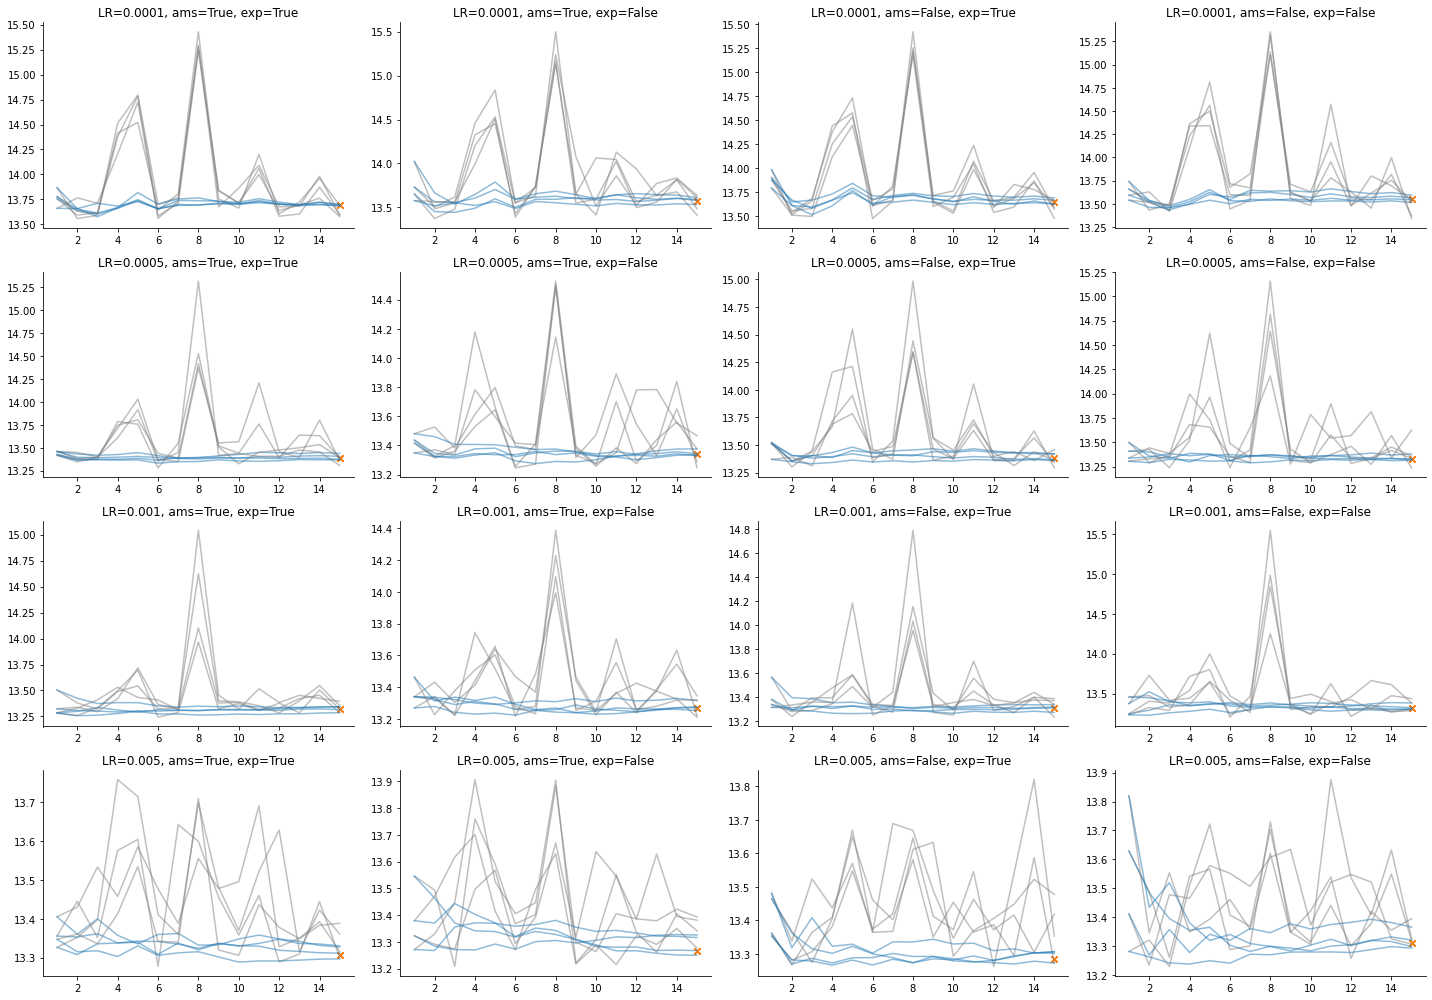

In [27]:
plt.figure(figsize=(20, 14))

for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    opt = combs[i]['optimizer']
    lr = combs[i]['learning_rate']
    ams = combs[i]['amsgrad']
    exp = combs[i]['exp_decay']
    ex = get_experiment(opt, lr, ams, exp)
    title = 'LR={}, ams={}, exp={}'.format(lr, ams, exp)
    plot_experiment(ex, ax=ax, title=title)
    
plt.tight_layout()

In [28]:
df_all[df_all['ensemble']].sort_values('smape')

,optimizer,learning_rate,amsgrad,exponential_decay,num,epoch,ensemble,smape,mase*
2297,adam,0.100,False,True,NaN,1.0,True,13.169374,2.685705
2308,adam,0.100,False,True,NaN,12.0,True,13.204451,2.688343
2032,adam,0.005,True,False,NaN,8.0,True,13.204944,2.689074
2301,adam,0.100,False,True,NaN,5.0,True,13.220213,2.702328
1489,adam,0.001,True,False,NaN,9.0,True,13.224161,2.691448
...,...,...,...,...,...,...,...,...,...
2581,adam,0.500,False,True,NaN,13.0,True,199.294028,4217.145423
2541,adam,0.500,False,True,2.0,2.0,True,199.548433,6076.695826
2481,adam,0.500,False,True,3.0,2.0,True,199.730869,13584.741056
2539,adam,0.500,False,True,2.0,1.0,True,199.783328,12153.678322


In [29]:
adam_comb_dict_new = {'optimizer': ['adam'],
                      'learning_rate': [0.005, 0.1, 0.2, 0.5],
                      'amsgrad': [False],
                      'exp_decay': [True]}

combs = list(training.make_runs(adam_comb_dict_new))

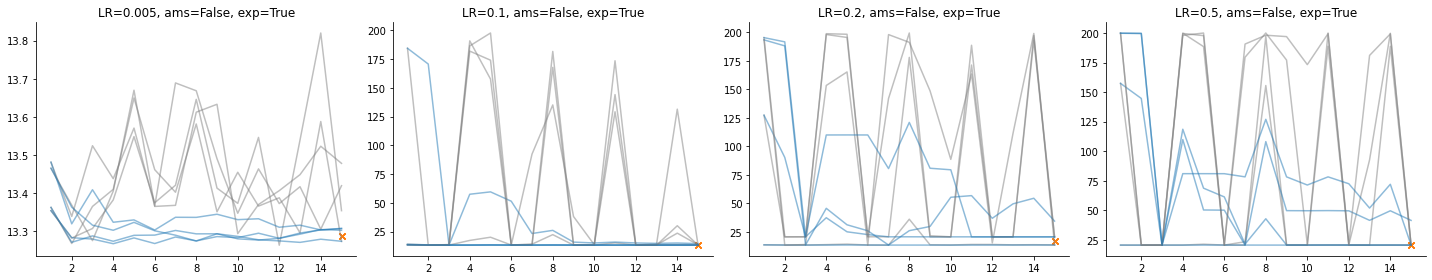

In [31]:
plt.figure(figsize=(20, 4))

for i in range(4):
    ax = plt.subplot(1, 4, i+1)
    opt = combs[i]['optimizer']
    lr = combs[i]['learning_rate']
    ams = combs[i]['amsgrad']
    exp = combs[i]['exp_decay']
    ex = get_experiment(opt, lr, ams, exp)
    title = 'LR={}, ams={}, exp={}'.format(lr, ams, exp)
    plot_experiment(ex, ax=ax, title=title)
    
plt.tight_layout()

In [35]:
df_all[df_all['epoch'].isna()]

,optimizer,learning_rate,amsgrad,exponential_decay,num,epoch,ensemble,smape,mase*
135,adam,0.0001,False,False,NaN,NaN,True,13.547431,2.754627
271,adam,0.0001,False,True,NaN,NaN,True,13.649726,2.772149
407,adam,0.0001,True,False,NaN,NaN,True,13.569842,2.756273
543,adam,0.0001,True,True,NaN,NaN,True,13.689928,2.781648
679,adam,0.0005,False,False,NaN,NaN,True,13.324379,2.717983
815,adam,0.0005,False,True,NaN,NaN,True,13.384012,2.723830
951,adam,0.0005,True,False,NaN,NaN,True,13.338413,2.722162
1087,adam,0.0005,True,True,NaN,NaN,True,13.392549,2.727560
1223,adam,0.0010,False,False,NaN,NaN,True,13.319044,2.719136
1359,adam,0.0010,False,True,NaN,NaN,True,13.310664,2.711411


In [ ]:
df_all[df_all['ensemble']].sort_values('smape')

## RMSprop

In [9]:
df_rms = pd.read_csv('../reports/training_hyperparameters/rmsprop/results.csv')

In [20]:
def get_experiment_rms(opt, lr, exp):
    return df_rms[(df_rms['optimizer'] == opt) & (df_rms['learning_rate'] == lr)
                  & (df_rms['exponential_decay'] == exp)]

rms_comb_dict = {'optimizer': ['rmsprop'],
                  'learning_rate': [0.0001, 0.0005, 0.001, 0.005],
                  'exp_decay': [True, False]}

combs = list(training.make_runs(rms_comb_dict))

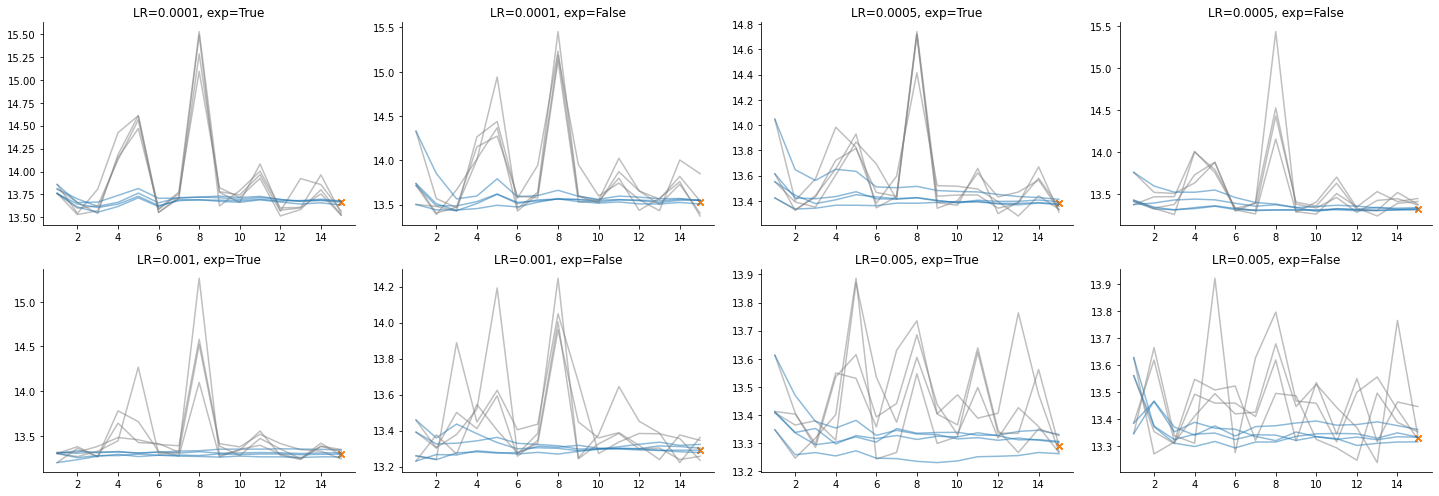

In [22]:
plt.figure(figsize=(20, 7))

for i in range(len(combs)):
    ax = plt.subplot(2, 4, i+1)
    opt = combs[i]['optimizer']
    lr = combs[i]['learning_rate']
    exp = combs[i]['exp_decay']
    ex = get_experiment_rms(opt, lr, exp)
    title = 'LR={}, exp={}'.format(lr, exp)
    plot_experiment(ex, ax=ax, title=title)
    
plt.tight_layout()